# Solving Lotka-Volterra ODEs

In [1]:
using Gadfly
using DataFrames
using DifferentialEquations

In [2]:
a = parse(Int64, readline());
b = parse(Int64, readline());
c = parse(Int64, readline());
d = parse(Int64, readline());
start_u = parse(Int64, readline());
end_u = parse(Int64, readline());

STDIN> 1
STDIN> 1
STDIN> 1
STDIN> 1
STDIN> 3
STDIN> 4


## Modeling equations and solving with RK4 method

Given problem can be represented by this system of equations:  

$ \begin{cases} \frac{dx}{dt} = Ax-Bxy \\ \frac{dy}{dt} = -Cy+Dxy \end{cases}$

In [3]:
function LVE(du,u,p,t)
 du[1] = a*u[1]-b*u[2]*u[1]
 du[2] = -c*u[2] + d*u[1]*u[2]
end

LVE (generic function with 1 method)

### Solving ODEs with RK4 method

In [4]:
u0 = [5.0;3.0]
tspan = (0.0,40.0)
problem = ODEProblem(LVE,u0,tspan)
sol = solve(problem, RK4())

retcode: Success
Interpolation: 3rd order Hermite
t: 238-element Array{Float64,1}:
  0.0      
  0.0346057
  0.0607757
  0.103669 
  0.156669 
  0.203738 
  0.255649 
  0.307923 
  0.364158 
  0.424874 
  0.495771 
  0.562331 
  0.630172 
  ⋮        
 38.7806   
 38.9476   
 39.0958   
 39.2304   
 39.3519   
 39.4629   
 39.5647   
 39.659    
 39.748    
 39.8343   
 39.9227   
 40.0      
u: 238-element Array{Array{Float64,1},1}:
 [5.0, 3.0]          
 [4.63175, 3.42392]  
 [4.32854, 3.75054]  
 [3.80327, 4.27803]  
 [3.14524, 4.87717]  
 [2.59218, 5.32461]  
 [2.04969, 5.7005]   
 [1.59194, 5.94802]  
 [1.20012, 6.07909]  
 [0.880827, 6.091]   
 [0.616013, 5.97972] 
 [0.444836, 5.79369] 
 [0.323891, 5.55528] 
 ⋮                   
 [2.55416, 0.0260118]
 [3.00326, 0.0349749]
 [3.46191, 0.0486585]
 [3.92969, 0.0699006]
 [4.39188, 0.102586] 
 [4.83941, 0.1532]   
 [5.25571, 0.23125]  
 [5.6218, 0.351618]  
 [5.91069, 0.537721] 
 [6.08057, 0.82831]  
 [6.05594, 1.29875]  
 [5.78853, 1.

In [5]:
arr1 = []
arr2 = []
for i = 1:length(sol.u)
    push!(arr1,sol.u[i][1])
    push!(arr2,sol.u[i][2])
end

In [6]:
writedlm("file.csv", [["t"; sol.t] ["x"; arr1] ["y"; arr2] ["experiment"; fill("exp1", length(arr1))]],';')

In [7]:
df1=DataFrame(t=sol.t, u=arr1)
df2=DataFrame(t=sol.t, u=arr2)

,t,u
1,0.0,3.0
2,0.03460567923621631,3.423918792720264
3,0.060775679880838124,3.7505403131676767
4,0.10366883657612176,4.278029863082527
5,0.15666890313362464,4.877165520500431
6,0.20373785325111698,5.32461126188563
7,0.2556488110798236,5.700502907752767
8,0.30792255583656386,5.948018279103658
9,0.3641576185424292,6.079089204210598
10,0.42487354932822446,6.090996923149803


### Simple plotting 

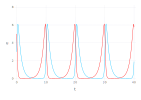

In [9]:
plot(layer(df1, x="t", y="u", Geom.line, Theme(default_color="red")),
     layer(df2, x="t", y="u", Geom.line))

## Series of experiments

Now we are going to use completed script from `LVSolver.jl` which is simply same as above code. 

In [16]:
run(`julia LVSolver.jl 1 1 1 1 3 5 exp1.csv`)

Output written to:exp1.csv


In [17]:
run(`julia LVSolver.jl 1 2 3 4 3 5 exp2.csv`)

Output written to:exp2.csv


In [18]:
run(`julia LVSolver.jl 3 1 3 1 3 5 exp3.csv`)

Output written to:exp3.csv


In [29]:
run(`julia LVSolver.jl 4 4 2 1 3 5 exp4.csv`)

Output written to:exp4.csv


### Reading csv files into one DataFrame

In [31]:
df1 = readtable("exp1.csv", separator=';');
df2 = readtable("exp2.csv", separator=';');
df3 = readtable("exp3.csv", separator=';');
df4 = readtable("exp4.csv", separator=';');

full_df = [df1; df2; df3; df4];

### Analysing data

In [32]:
for exp = ["exp1.csv", "exp2.csv", "exp3.csv", "exp4.csv"]
    
    single_exp = full_df[full_df[:experiment].==exp, :]
    print("Analysing ", exp, " experiment:\n")
    print("Mean: ", mean(single_exp[:x]), "\n")
    print("Max: ", maximum(single_exp[:x]), "\n")
    print("Min: ", minimum(single_exp[:x]), "\n\n")
    
end


full_df[:Difference] = full_df[:y] .- full_df[:x]

full_df

Analysing exp1.csv experiment:
Mean: 1.4796801562737738
Max: 6.098932167724156
Min: 0.013870409013308802

Analysing exp2.csv experiment:
Mean: 1.2166029842470703
Max: 5.0697243576068365
Min: 0.005901145659198244

Analysing exp3.csv experiment:
Mean: 2.9804941517392205
Max: 4.999176411055367
Min: 1.6215595787741823

Analysing exp4.csv experiment:
Mean: 2.7985111462246097
Max: 15.899002512959317
Min: 0.005617964797744349



,t,x,y,experiment,Difference
1,0.0,3.0,5.0,exp1.csv,2.0
2,0.03437010542705209,2.5999920844604953,5.318694099508249,exp1.csv,2.718702015047753
3,0.05919540894215747,2.3298236734353797,5.515477048134935,exp1.csv,3.1856533746995552
4,0.09629993783995372,1.9613112034139877,5.7541778432075645,exp1.csv,3.792866639793577
5,0.1334902226380723,1.6378585587902803,5.926997595707242,exp1.csv,4.2891390369169615
6,0.17801648177354856,1.3111621993767777,6.0521024853558,exp1.csv,4.740940285979022
7,0.2266993708501133,1.0237400890897375,6.099938498682014,exp1.csv,5.076198409592276
8,0.2841602856599874,0.7642438058323413,6.060615555884493,exp1.csv,5.2963717500521525
9,0.35002617529542335,0.5498779391981132,5.922736869409152,exp1.csv,5.372858930211039
10,0.41037379354838455,0.41074907423440943,5.73853471981897,exp1.csv,5.3277856455845605


## 3. Plotting

### Phase space plot

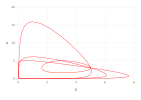

In [33]:
plot(layer(df1, x="y", y="x", Geom.polygon, Theme(default_color="red")),
  layer(df2, x="y", y="x", Geom.polygon, Theme(default_color="red")),
  layer(df3, x="y", y="x", Geom.polygon, Theme(default_color="red")),
  layer(df4, x="y", y="x", Geom.polygon, Theme(default_color="red")))

### Group plots - all experiments

#### Here I tried to use "subplot_grig".

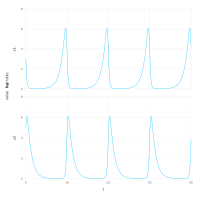

In [38]:
example = DataFrame(t=df1[:t], x1=df1[:x], x2=df1[:y])

xd = stack(example, [:x1, :x2])

plot(xd, ygroup="variable", x="t", y="value", Geom.subplot_grid(Geom.line))


#### Full plot.

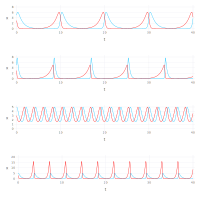

In [41]:
pl1 = plot(layer(df1, x="t", y="x", Geom.line, Theme(default_color="red")),
     layer(df1, x="t", y="y", Geom.line))
pl2 = plot(layer(df2, x="t", y="x", Geom.line, Theme(default_color="red")),
     layer(df2, x="t", y="y", Geom.line))
pl3 = plot(layer(df3, x="t", y="x", Geom.line, Theme(default_color="red")),
     layer(df3, x="t", y="y", Geom.line))
pl4 = plot(layer(df4, x="t", y="x", Geom.line, Theme(default_color="red")),
     layer(df4, x="t", y="y", Geom.line))
set_default_plot_size(20cm, 20cm)
vstack(pl1, pl2, pl3, pl4)